## Retrieve and load the Olivetti faces dataset

In [1]:
# Import dependencies
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti faces dataset
data = fetch_olivetti_faces()
X, y = data.data, data.target

## Split the training set using stratified sampling

In [2]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Validation set size: {X_val.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 240, Validation set size: 80, Test set size: 80


## Train a classifier using k-fold cross validation and evaluate it on the validation set

In [3]:
# Train classifier using k-fold cross-validation
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

clf = SVC(kernel='rbf', random_state=42)
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(clf, X_train, y_train, cv=skf)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Evaluate on the validation set
clf.fit(X_train, y_train)
val_score = clf.score(X_val, y_val)
print(f"Validation Accuracy: {val_score:.4f}")

Cross-Validation Accuracy: 0.8625
Validation Accuracy: 0.9250


## Reduce the dimensionality of the set by using Agglomerative Hierarchical Clustering (AHC)

### Euclidean Distance

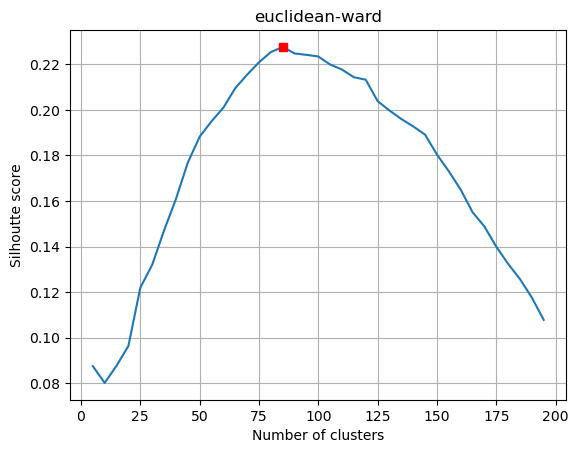

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_range = range(5, 200, 5)

# euclidean-ward
silhouette_scores_euclidean_ward = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='ward')
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_euclidean_ward.append(silhouette_score(X_train, agg_labels))

best_index_euclidean_ward = np.argmax(silhouette_scores_euclidean_ward)
best_k_euclidean_ward = k_range[best_index_euclidean_ward]
best_score_euclidean_ward = silhouette_scores_euclidean_ward[best_index_euclidean_ward]
    
plt.plot(range(5, 200, 5), silhouette_scores_euclidean_ward)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-ward')
plt.plot(best_k_euclidean_ward, best_score_euclidean_ward, "rs")
plt.grid()
plt.show()


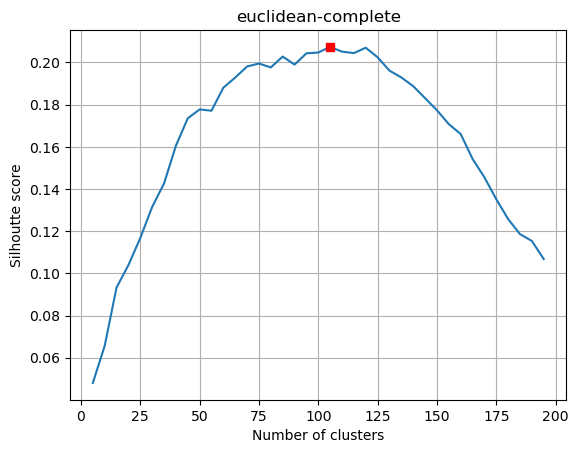

In [5]:
# euclidean-complete
silhouette_scores_euclidean_complete = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_euclidean_complete.append(silhouette_score(X_train, agg_labels))
    
best_index_euclidean_complete = np.argmax(silhouette_scores_euclidean_complete)
best_k_euclidean_complete = k_range[best_index_euclidean_complete]
best_score_euclidean_complete = silhouette_scores_euclidean_complete[best_index_euclidean_complete]
    
plt.plot(range(5, 200, 5), silhouette_scores_euclidean_complete)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-complete')
plt.plot(best_k_euclidean_complete, best_score_euclidean_complete, "rs")
plt.grid()
plt.show()

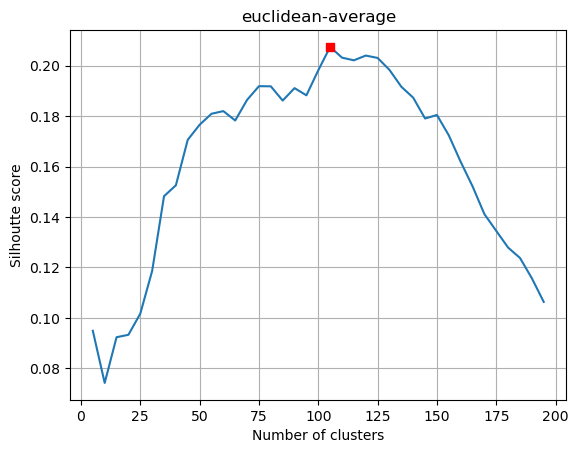

In [6]:
# euclidean-average
silhouette_scores_euclidean_average = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_euclidean_average.append(silhouette_score(X_train, agg_labels))
    
best_index_euclidean_average = np.argmax(silhouette_scores_euclidean_average)
best_k_euclidean_average = k_range[best_index_euclidean_average]
best_score_euclidean_average = silhouette_scores_euclidean_average[best_index_euclidean_average]
    
plt.plot(range(5, 200, 5), silhouette_scores_euclidean_average)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-average')
plt.plot(best_k_euclidean_average, best_score_euclidean_average, "rs")
plt.grid()
plt.show()

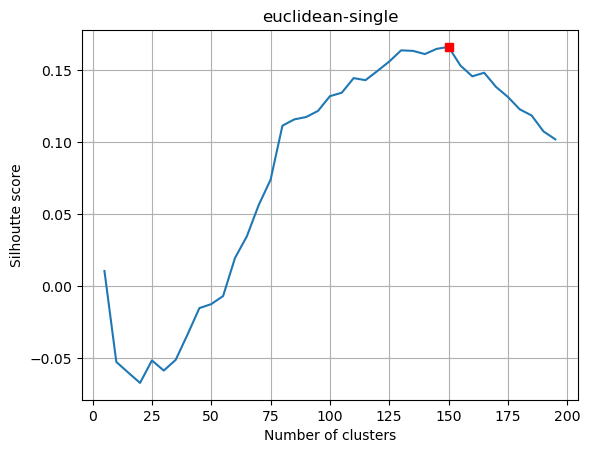

In [7]:
# euclidean-single
silhouette_scores_euclidean_single = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='single')
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_euclidean_single.append(silhouette_score(X_train, agg_labels))
    
best_index_euclidean_single = np.argmax(silhouette_scores_euclidean_single)
best_k_euclidean_single = k_range[best_index_euclidean_single]
best_score_euclidean_single = silhouette_scores_euclidean_single[best_index_euclidean_single]
    
plt.plot(range(5, 200, 5), silhouette_scores_euclidean_single)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-single')
plt.plot(best_k_euclidean_single, best_score_euclidean_single, "rs")
plt.grid()
plt.show()

### Minkowski Distance

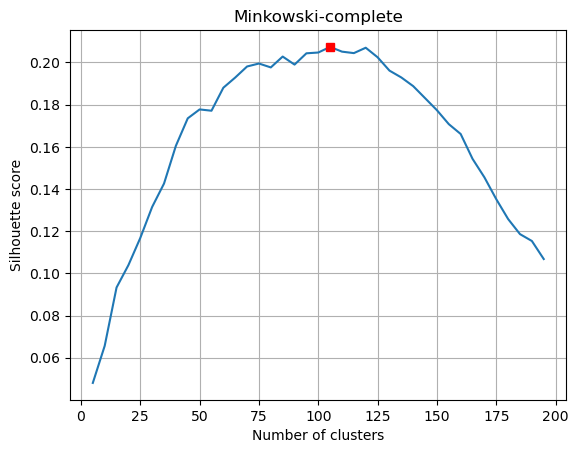

In [8]:
# minkowski-complete
silhouette_scores_minkowski_complete = []
k_range = range(5, 200, 5)

for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                             metric='minkowski',
                                             linkage='complete',
                                             compute_distances=True)  # Added for compatibility
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_minkowski_complete.append(silhouette_score(X_train, agg_labels))

best_index_minkowski_complete = np.argmax(silhouette_scores_minkowski_complete)
best_k_minkowski_complete = k_range[best_index_minkowski_complete]
best_score_minkowski_complete = silhouette_scores_minkowski_complete[best_index_minkowski_complete]

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores_minkowski_complete)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Minkowski-complete')
plt.plot(best_k_minkowski_complete, best_score_minkowski_complete, "rs")
plt.grid()
plt.show()

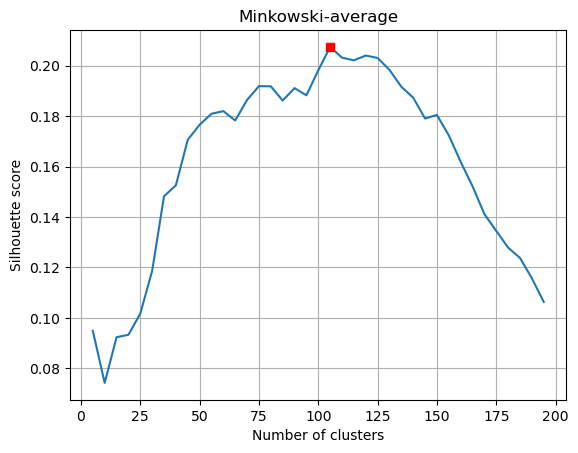

In [9]:
# minkowski-average
silhouette_scores_minkowski_average = []
k_range = range(5, 200, 5)

for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                             metric='minkowski',
                                             linkage='average',
                                             compute_distances=True)  # Added for compatibility
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_minkowski_average.append(silhouette_score(X_train, agg_labels))

best_index_minkowski_average = np.argmax(silhouette_scores_minkowski_average)
best_k_minkowski_average = k_range[best_index_minkowski_average]
best_score_minkowski_average = silhouette_scores_minkowski_average[best_index_minkowski_average]

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores_minkowski_average)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Minkowski-average')
plt.plot(best_k_minkowski_average, best_score_minkowski_average, "rs")
plt.grid()
plt.show()

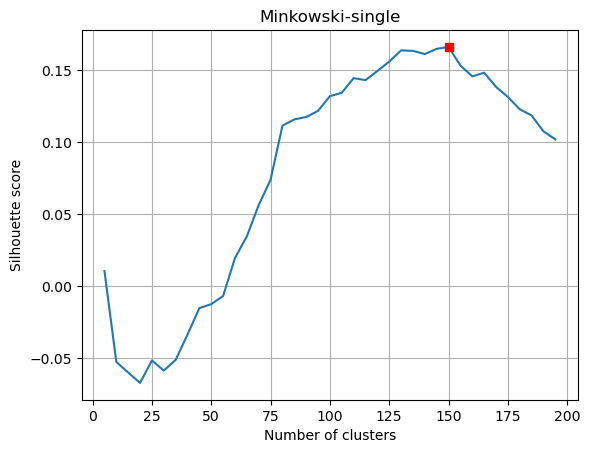

In [10]:
# minkowski-single
silhouette_scores_minkowski_single = []
k_range = range(5, 200, 5)

for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                             metric='minkowski',
                                             linkage='single',
                                             compute_distances=True)  # Added for compatibility
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_minkowski_single.append(silhouette_score(X_train, agg_labels))

best_index_minkowski_single = np.argmax(silhouette_scores_minkowski_single)
best_k_minkowski_single = k_range[best_index_minkowski_single]
best_score_minkowski_single = silhouette_scores_minkowski_single[best_index_minkowski_single]

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores_minkowski_single)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Minkowski-single')
plt.plot(best_k_minkowski_single, best_score_minkowski_single, "rs")
plt.grid()
plt.show()

### Cosine Similarity

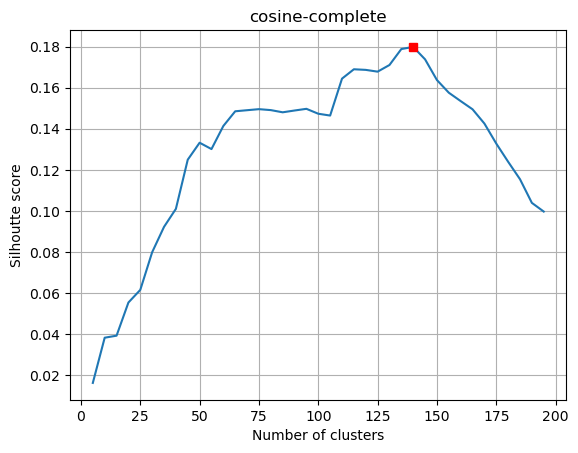

In [11]:
silhouette_scores_cosine_complete = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_cosine_complete.append(silhouette_score(X_train, agg_labels))
    
best_index_cosine_complete = np.argmax(silhouette_scores_cosine_complete)
best_k_cosine_complete = k_range[best_index_cosine_complete]
best_score_cosine_complete = silhouette_scores_cosine_complete[best_index_cosine_complete]
    
plt.plot(range(5, 200, 5), silhouette_scores_cosine_complete)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-complete')
plt.plot(best_k_cosine_complete, best_score_cosine_complete, "rs")
plt.grid()
plt.show()

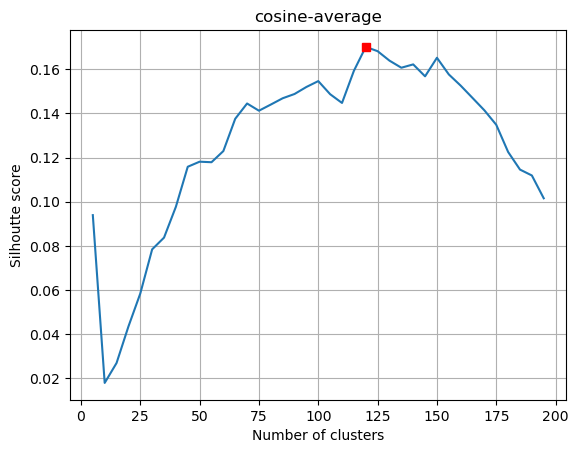

In [12]:
# cosine-average
silhouette_scores_cosine_average = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_cosine_average.append(silhouette_score(X_train, agg_labels))
    
best_index_cosine_average = np.argmax(silhouette_scores_cosine_average)
best_k_cosine_average = k_range[best_index_cosine_average]
best_score_cosine_average = silhouette_scores_cosine_average[best_index_cosine_average]
    
plt.plot(range(5, 200, 5), silhouette_scores_cosine_average)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-average')
plt.plot(best_k_cosine_average, best_score_cosine_average, "rs")
plt.grid()
plt.show()

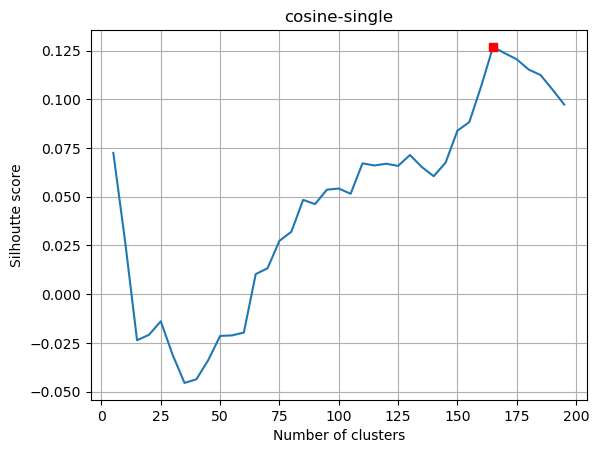

In [13]:
# cosine-single
silhouette_scores_cosine_single = []
for n_clusters in range(5, 200, 5):
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='single')
    agg_labels = agg_clustering.fit_predict(X_train)
    silhouette_scores_cosine_single.append(silhouette_score(X_train, agg_labels))
    
best_index_cosine_single = np.argmax(silhouette_scores_cosine_single)
best_k_cosine_single = k_range[best_index_cosine_single]
best_score_cosine_single = silhouette_scores_cosine_single[best_index_cosine_single]
    
plt.plot(range(5, 200, 5), silhouette_scores_cosine_single)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-single')
plt.plot(best_k_cosine_single, best_score_cosine_single, "rs")
plt.grid()
plt.show()

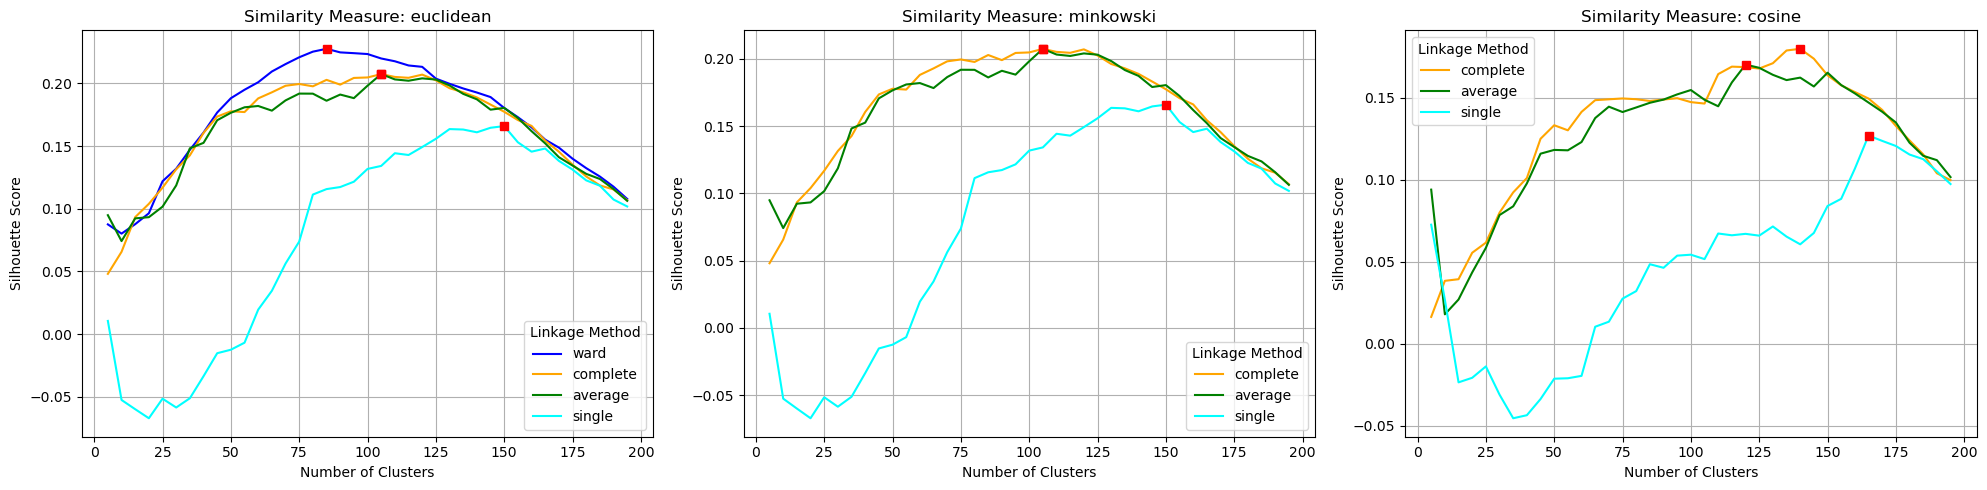

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the similarity measures and linkage methods
similarity_measures = ['euclidean', 'minkowski', 'cosine']
linkage_methods = ['ward', 'complete', 'average', 'single']

# Predefined colors for each linkage method
linkage_colors = {
    'ward': 'blue',         # Unique for ward linkage
    'complete': 'orange',   # Consistent for all graphs
    'average': 'green',     # Consistent for all graphs
    'single': 'cyan'         # Consistent for all graphs
}

# Assuming silhouette scores and best k values from earlier computations are stored as:
results = {
    'euclidean': {
        'ward': {'silhouette_scores': silhouette_scores_euclidean_ward, 'best_k': best_k_euclidean_ward, 'best_score': best_score_euclidean_ward},
        'complete': {'silhouette_scores': silhouette_scores_euclidean_complete, 'best_k': best_k_euclidean_complete, 'best_score': best_score_euclidean_complete},
        'average': {'silhouette_scores': silhouette_scores_euclidean_average, 'best_k': best_k_euclidean_average, 'best_score': best_score_euclidean_average},
        'single': {'silhouette_scores': silhouette_scores_euclidean_single, 'best_k': best_k_euclidean_single, 'best_score': best_score_euclidean_single},
    },
    'minkowski': {
        'complete': {'silhouette_scores': silhouette_scores_minkowski_complete, 'best_k': best_k_minkowski_complete, 'best_score': best_score_minkowski_complete},
        'average': {'silhouette_scores': silhouette_scores_minkowski_average, 'best_k': best_k_minkowski_average, 'best_score': best_score_minkowski_average},
        'single': {'silhouette_scores': silhouette_scores_minkowski_single, 'best_k': best_k_minkowski_single, 'best_score': best_score_minkowski_single},
    },
    'cosine': {
        'complete': {'silhouette_scores': silhouette_scores_cosine_complete, 'best_k': best_k_cosine_complete, 'best_score': best_score_cosine_complete},
        'average': {'silhouette_scores': silhouette_scores_cosine_average, 'best_k': best_k_cosine_average, 'best_score': best_score_cosine_average},
        'single': {'silhouette_scores': silhouette_scores_cosine_single, 'best_k': best_k_cosine_single, 'best_score': best_score_cosine_single},
    }
}

# Create a figure with one plot for each similarity measure
fig, axes = plt.subplots(1, len(similarity_measures), figsize=(20, 5))

for i, metric in enumerate(similarity_measures):
    for linkage in linkage_methods:
        # Skip 'ward' for non-euclidean measures
        if linkage == 'ward' and metric != 'euclidean':
            continue
        
        # Retrieve precomputed silhouette scores and best values
        silhouette_scores = results[metric][linkage]['silhouette_scores']
        best_k = results[metric][linkage]['best_k']
        best_score = results[metric][linkage]['best_score']

        # Plotting all linkage methods on the same axis (per similarity measure)
        axes[i].plot(k_range, silhouette_scores, label=f"{linkage}", color=linkage_colors[linkage])
        axes[i].plot(best_k, best_score, "rs")  # Highlight best score with a red square

    # Set title and labels for each plot (per similarity measure)
    axes[i].set_title(f"Similarity Measure: {metric}")
    axes[i].set_xlabel("Number of Clusters")
    axes[i].set_ylabel("Silhouette Score")
    axes[i].grid()
    axes[i].legend(title="Linkage Method")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

results = {
    "Configuration": ["euclidean-ward", "euclidean-complete", "euclidean-average", "euclidean-single", 
                      "minkowski-complete", "minkowski-average", "minkowski-single", 
                      "cosine-complete", "cosine-average", "cosine-single"],
    "Best K": [best_k_euclidean_ward, best_k_euclidean_complete, best_k_euclidean_average, best_k_euclidean_single, 
               best_k_minkowski_complete, best_k_minkowski_average, best_k_minkowski_single, 
               best_k_cosine_complete, best_k_cosine_average, best_k_cosine_single],
    "Best Silhouette Score": [best_score_euclidean_ward, best_score_euclidean_complete, best_score_euclidean_average, best_score_euclidean_single, 
                              best_score_minkowski_complete, best_score_minkowski_average, best_score_minkowski_single, 
                              best_score_cosine_complete, best_score_cosine_average, best_score_cosine_single]
}

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

        Configuration  Best K  Best Silhouette Score
0      euclidean-ward      85               0.227584
1  euclidean-complete     105               0.207384
2   euclidean-average     105               0.207427
3    euclidean-single     150               0.165935
4  minkowski-complete     105               0.207384
5   minkowski-average     105               0.207427
6    minkowski-single     150               0.165935
7     cosine-complete     140               0.179822
8      cosine-average     120               0.170165
9       cosine-single     165               0.126916


## Train the classifier using the best parameters

In [16]:
best_agg_clustering = AgglomerativeClustering(n_clusters = 85,
                                              metric='euclidean',
                                             linkage='ward')

best_agg_labels = best_agg_clustering.fit_predict(X_train)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train_aug = np.hstack((X_train, best_agg_labels.reshape(-1, 1)))

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svc', SVC(kernel='rbf', random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train_aug, y_train, cv=skf)

print(f"Cross-Validation Accuracy with Augmented Features: {np.mean(cv_scores):.4f}")


Cross-Validation Accuracy with Augmented Features: 0.8750
